In [17]:
from usergeneration import User
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

def make_n_users(n):
    users = []
    for i in range(n):
        users.append(User())
    
    return users 


users_list = make_n_users(50000)
df = pd.DataFrame([t.__dict__ for t in users_list ])



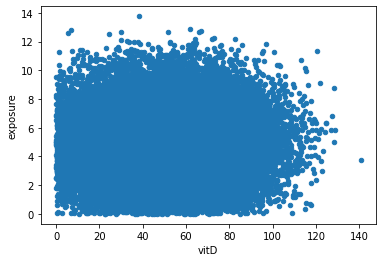

In [18]:
df.plot.scatter(y='exposure', x = 'vitD')


In [19]:
bool_symptom_df = df['symptoms'].str.join(',').str.get_dummies(sep=',').astype(int)
df_train = df.join(bool_symptom_df).drop(columns=['symptoms'])
X = np.array(df_train[df_train.columns[1:]])
y = np.array(df_train.vitD)

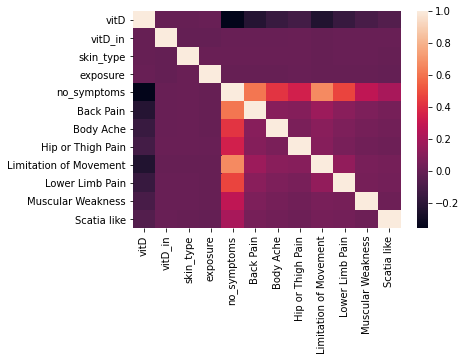

In [20]:
from sklearn.model_selection import * 
import seaborn as sns 
Var_Corr = df_train.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0, shuffle = True)

In [22]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=0,min_samples_leaf=4, min_samples_split=4) 
regr.fit(X_train, y_train)
predict_test_score = regr.score(X_test,y_test)
predict_train_score = regr.score(X_train,y_train)






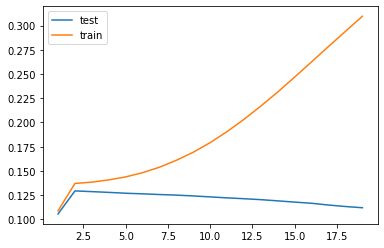

In [23]:
max_depth_search = np.arange(1,20,1)
predict_test_score_list = [] 
predict_train_score_list = [] 

for i in max_depth_search:
    regr = RandomForestRegressor(max_depth=i, random_state=0,min_samples_leaf=4, min_samples_split=4) 
    regr.fit(X_train, y_train)
    predict_test_score_list.append( regr.score(X_test,y_test))
    predict_train_score_list.append( regr.score(X_train,y_train)) 


plt.plot(max_depth_search,predict_test_score_list,label ='test')
plt.plot(max_depth_search,predict_train_score_list,label ='train')
plt.legend()
plt.show()

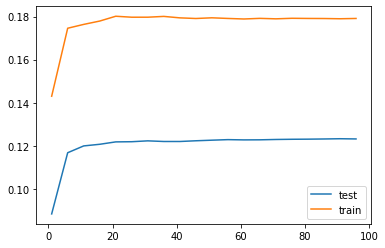

In [24]:
estimators_search = np.arange(1,100,5)
predict_test_score_list = [] 
predict_train_score_list = [] 

for i in estimators_search:
    regr = RandomForestRegressor(max_depth=10, random_state=0,min_samples_leaf=4, min_samples_split=4,n_estimators=i) 
    regr.fit(X_train, y_train)
    predict_test_score_list.append( regr.score(X_test,y_test))
    predict_train_score_list.append( regr.score(X_train,y_train)) 


plt.plot(estimators_search,predict_test_score_list,label ='test')
plt.plot(estimators_search,predict_train_score_list,label ='train')
plt.legend()
plt.show()